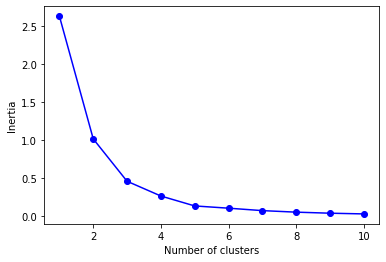

In [1]:
import matplotlib.pyplot as plt

import geopandas as gpd

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import folium

# Load your dataset into a GeoDataFrame
gdf = gpd.read_file("Jetty_pts.shp")
coords = gdf[["POINT_X", "POINT_Y"]].values

inertia = []

# Run the KMeans algorithm for a range of values of k
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(coords)
    inertia.append(kmeans.inertia_)

# Plot the inertia values against the number of clusters
plt.plot(range(1, 11), inertia, 'bo-')
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

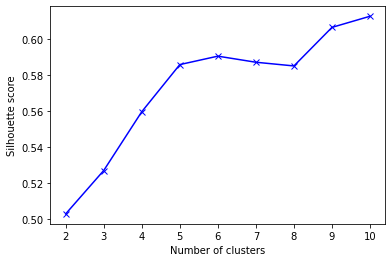

In [2]:
scores = []

# Run the KMeans algorithm for a range of values of k
for k in range(2, 11):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(coords)
    labels = kmeans.labels_
    scores.append(silhouette_score(coords, labels))

# Plot the silhouette scores against the number of clusters
plt.plot(range(2, 11), scores, 'bx-')
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.show()

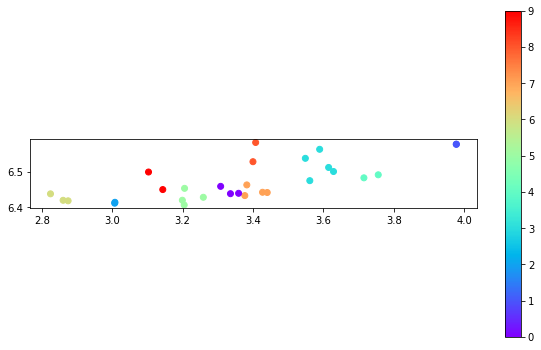

In [3]:
kmeans = KMeans(n_clusters = 10)

# Fit the model to the data
kmeans.fit(coords)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Add the labels as a new column to the DataFrame
gdf["cluster"] = labels

# Create a choropleth map to visualize the clusters
gdf.plot(column = "cluster", cmap = "rainbow", legend = True, figsize = (10, 6))
plt.show()
m = folium.Map(location = [gdf["POINT_Y"].mean(), gdf["POINT_X"].mean()], zoom_start = 13)

# Add a basemap
folium.TileLayer('openstreetmap').add_to(m)

# Create a feature group for each cluster
for i in range(kmeans.n_clusters):
    group = folium.FeatureGroup(name = "Cluster " + str(i))
    group.add_child(folium.GeoJson(gdf[gdf["cluster"] == i].to_json()))
    group.add_to(m)

# Show the map
m

In [4]:
gdf.to_csv("Jetty_pts_clustered.csv", index = False)